In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas_profiling as pp

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [327]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score,RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold, cross_val_predict, cross_validate, LeaveOneOut
from sklearn.linear_model import ARDRegression, Lasso, LassoCV, LogisticRegression, Ridge, RidgeCV, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [6]:
from sklearn.feature_selection import SelectKBest

In [578]:
from sklearn.manifold import Isomap, TSNE, t_sne
from sklearn.decomposition import PCA

In [27]:
pd.set_option('display.max_columns',50)

In [585]:
! ls

 ARD.png	   corr_pirson.png      IT_project_Jeka_Melnik+Boy.csv
 ARD_predict.png  'GP Showdown.ipynb'   IT_project_Jeka_Melnik.csv
 ARD_scaler.png   'IT project .ipynb'


In [29]:
data=pd.read_csv('IT_project_Jeka_Melnik.csv',skiprows=2)

In [51]:
col= list(data.columns)
col[0]='Project ID'
col[-1]='Target Succes'
data.columns=col

In [671]:
data

,Project ID,Phone call,Organize first client meeting and make meeting notes,Present notes about the prospect project to PM,Prepare pre-project questionnaire,Gather information for a brief and answers for questionnaire,Prepare a brief + sketches,Present sketch to the prospect client and approve,Present to PM,Conduct feasibility study,Prepare a ROM estimate based on the brief and the sketches,Present ROM to the client and approve,Prepare a plan for specification phase,Prepare a specification contract,Prepare a specification based on the brief,Prepare design mock ups based on the sketches,Present design to the client and approve,Prepare an acceptance criteria based on the specification and the design mock-ups,Present acceptance criteria to the client and approve,Prepare a money and time estimate based on the specification and the design mock-ups,Present estimation to the client and approve,Conduct risk analysis and define mitigation measures,Prepare a risk management report,Present the risk management report to the client,Prepare a project contract,Present and sign,"Resource availability analysis (human resources, software, etc.)",Plan acquisition of additional resources (if required),Plan education of new human resources (if required),Schedule resource involvement,Prepare a detailed work breakdown structure,Assign tasks to team members (if required),Prepare a detailed work breakdown structure.1,Prepare a detailed hours break down based on the WBS and the final estimate,"Prepare a risk management plan (mitigation measures, responsible people, deadlines, etc) based on the risk management report",Prepare a risk status tracking,"Document, which will be updated during the project period","Prepare a risk management plan (mitigation measures, responsible people, deadlines, etc) based on the risk management report.1","Prepare a detailed project plan based on the WBD, the resource schedule, the risk management plan",Present WBS to the client and approve,Check that everything is ready to start development and receive final approval from the client,Target Succes
0,LoungeFm,10,10,10,8,9,10,10,10,7,8,10,10,10,7,10,10,10,8,5,10,7,5,10,7,9,10,7,4,5,9,8,9,9,6,9,9,7,10,10,10,8
1,РадиоПятница,7,10,7,8,7,7,7,10,10,9,10,10,9,8,8,9,7,9,9,10,10,10,10,7,7,10,10,10,8,9,8,8,9,10,7,6,3,6,9,9,6
2,Ретро ФМ,10,9,7,7,8,9,10,4,10,8,9,4,8,8,7,9,9,9,10,10,10,10,10,10,7,10,8,8,8,9,9,9,10,10,10,10,10,7,7,8,3
3,NRJUkraine,8,10,10,4,3,10,7,8,10,8,7,10,10,8,7,7,7,10,10,10,10,10,8,5,6,9,9,9,9,8,10,10,9,9,10,9,9,9,10,8,4
4,НашеРадио,10,10,10,10,10,10,10,2,8,8,7,7,7,9,9,9,9,8,8,8,8,8,9,8,9,8,8,9,9,9,10,9,9,9,9,9,9,10,8,8,6
5,Шансон,1,10,9,10,8,9,8,10,10,9,9,9,7,8,9,9,7,5,8,6,8,5,9,7,4,9,8,8,5,8,9,9,9,9,9,9,9,8,9,6,9
6,ГолосСтолицы,6,6,8,7,7,10,4,9,3,8,5,6,10,7,10,10,8,7,9,10,8,8,7,10,9,9,10,9,9,9,9,8,7,10,9,9,10,9,10,8,6
7,RadioClub,7,8,8,8,4,10,5,9,2,6,9,7,10,7,6,7,7,6,7,10,7,6,8,10,9,8,10,8,10,10,8,7,8,9,9,9,10,9,10,10,7
8,Авторадио,8,8,8,9,8,4,8,9,5,7,8,10,10,7,10,9,5,4,5,9,5,5,5,9,8,6,10,5,10,10,6,7,9,8,7,9,3,9,9,9,6
9,ДжемФМ,9,10,7,9,3,8,6,8,10,8,9,9,10,8,10,7,6,6,6,8,7,10,6,4,9,8,10,6,8,10,8,8,7,5,9,9,4,9,9,3,7


In [71]:
data.shape

(34, 42)

In [591]:
data_full=pd.read_csv('IT_project_Jeka_Melnik+Boy.csv',skiprows=2)

In [593]:
data_full.shape

(57, 42)

In [594]:
data_full.columns=col

In [606]:
data_full.fillna(0, inplace=True)
data_full['Gather information for a brief and answers for questionnaire']=data_full['Gather information for a brief and answers for questionnaire'].astype(int)

In [607]:
data_full.head()

,Project ID,Phone call,Organize first client meeting and make meeting notes,Present notes about the prospect project to PM,Prepare pre-project questionnaire,Gather information for a brief and answers for questionnaire,Prepare a brief + sketches,Present sketch to the prospect client and approve,Present to PM,Conduct feasibility study,Prepare a ROM estimate based on the brief and the sketches,Present ROM to the client and approve,Prepare a plan for specification phase,Prepare a specification contract,Prepare a specification based on the brief,Prepare design mock ups based on the sketches,Present design to the client and approve,Prepare an acceptance criteria based on the specification and the design mock-ups,Present acceptance criteria to the client and approve,Prepare a money and time estimate based on the specification and the design mock-ups,Present estimation to the client and approve,Conduct risk analysis and define mitigation measures,Prepare a risk management report,Present the risk management report to the client,Prepare a project contract,Present and sign,"Resource availability analysis (human resources, software, etc.)",Plan acquisition of additional resources (if required),Plan education of new human resources (if required),Schedule resource involvement,Prepare a detailed work breakdown structure,Assign tasks to team members (if required),Prepare a detailed work breakdown structure.1,Prepare a detailed hours break down based on the WBS and the final estimate,"Prepare a risk management plan (mitigation measures, responsible people, deadlines, etc) based on the risk management report",Prepare a risk status tracking,"Document, which will be updated during the project period","Prepare a risk management plan (mitigation measures, responsible people, deadlines, etc) based on the risk management report.1","Prepare a detailed project plan based on the WBD, the resource schedule, the risk management plan",Present WBS to the client and approve,Check that everything is ready to start development and receive final approval from the client,Target Succes
0,LoungeFm,10,10,10,8,9,10,10,10,7,8,10,10,10,7,10,10,10,8,5,10,7,5,10,7,9,10,7,4,5,9,8,9,9,6,9,9,7,10,10,10,8
1,РадиоПятница,7,10,7,8,7,7,7,10,10,9,10,10,9,8,8,9,7,9,9,10,10,10,10,7,7,10,10,10,8,9,8,8,9,10,7,6,3,6,9,9,6
2,Ретро ФМ,10,9,7,7,8,9,10,4,10,8,9,4,8,8,7,9,9,9,10,10,10,10,10,10,7,10,8,8,8,9,9,9,10,10,10,10,10,7,7,8,3
3,NRJUkraine,8,10,10,4,3,10,7,8,10,8,7,10,10,8,7,7,7,10,10,10,10,10,8,5,6,9,9,9,9,8,10,10,9,9,10,9,9,9,10,8,4
4,НашеРадио,10,10,10,10,10,10,10,2,8,8,7,7,7,9,9,9,9,8,8,8,8,8,9,8,9,8,8,9,9,9,10,9,9,9,9,9,9,10,8,8,6


In [55]:
pp.ProfileReport(data)

Number of variables,42
Number of observations,34
Total Missing (%),0.0%
Total size in memory,11.2 KiB
Average record size in memory,338.4 B
Numeric,41
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [59]:
corr_df=pd.DataFrame(columns=['Features_name', 'corr' ])
corr_df['Features_name']=data.columns[1:-1]
corr_df['corr']=data.iloc[1:,:-1].corrwith(data['Target Succes']).values
corr_df=corr_df.sort_values(by='corr', ascending=False)
corr_df.head()

,Features_name,corr
3,Prepare pre-project questionnaire,0.473792
14,Prepare design mock ups based on the sketches,0.472721
34,Prepare a risk status tracking,0.416752
37,Prepare a detailed project plan based on the W...,0.403721
32,Prepare a detailed hours break down based on t...,0.368617


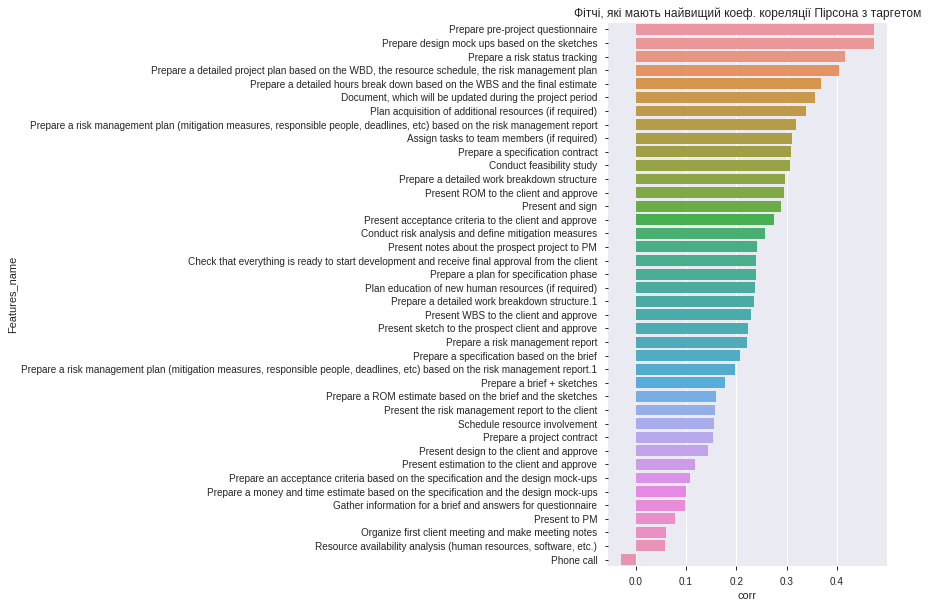

In [90]:
plt.figure(figsize=(5,10))
plt.title('Фітчі, які мають найвищий коеф. кореляції Пірсона з таргетом')
sns.barplot( y ='Features_name', x='corr', data=corr_df, orient='h')
plt.savefig('corr_pirson', dpi=300, bbox_inches = "tight")

In [631]:
Xtrain=data.iloc[:,1:-1]
ytrain=data.iloc[:,-1]

Xtest=data_full.iloc[34:,1:-1]
ytest=data_full.iloc[34:,-1]

In [612]:
Xtrain.shape, ytrain.shape

((34, 40), (34,))

In [613]:
Xtest.shape, ytest.shape

((23, 40), (23,))

Projecting 40-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection')

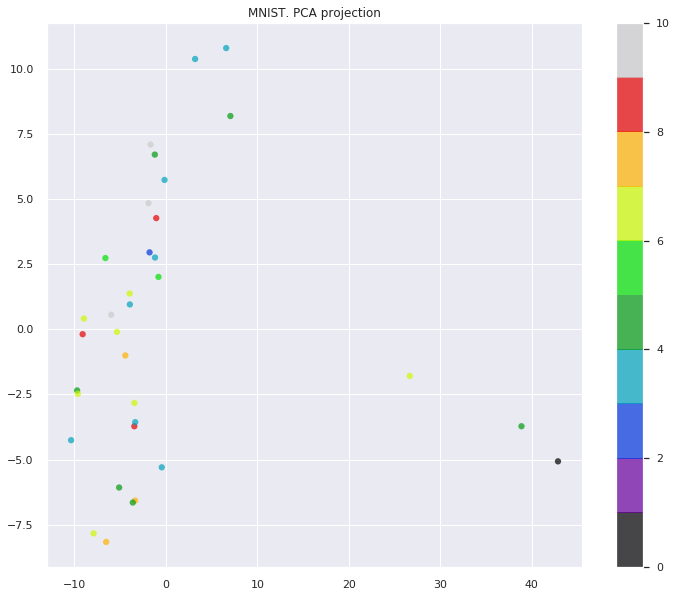

In [579]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(Xtrain)

print('Projecting %d-dimensional data to 2D' % Xtrain.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=ytrain, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

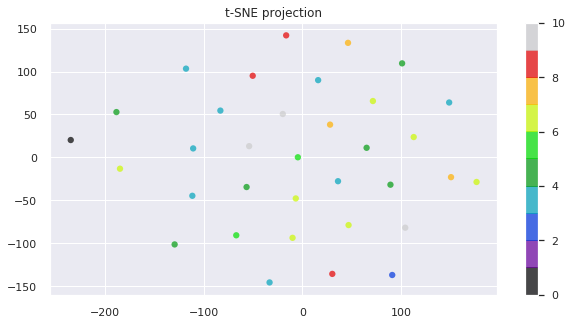

In [676]:
plt.figure(figsize=(10,5))

tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(Xtrain)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=ytrain, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('t-SNE projection')
plt.savefig('t-SNE projection', dpi=300, bbox_inches = "tight")

Text(0.5, 1.0, 'X_iso projection')

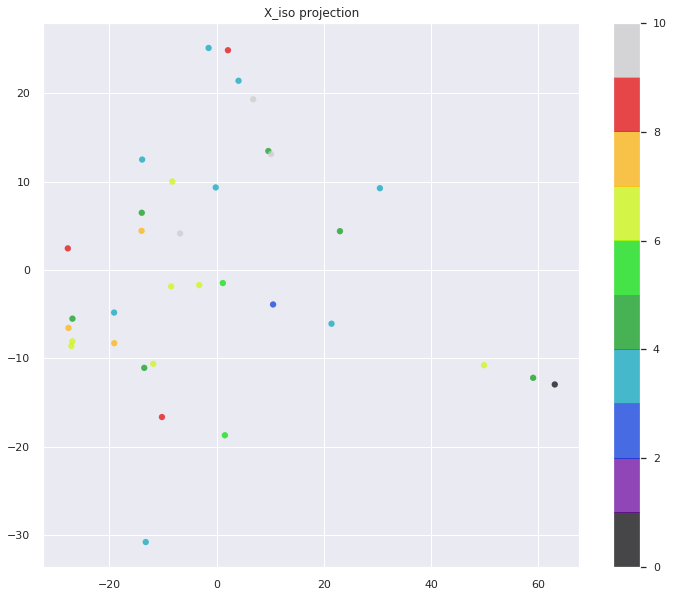

In [581]:


iso = Isomap(n_components=2)
iso.fit(Xtrain)
X_iso = iso.transform(Xtrain)


plt.figure(figsize=(12,10))
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=ytrain, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('X_iso projection')


In [72]:
Xtrain_scaler=StandardScaler().fit_transform(Xtrain)

/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [632]:
ard = ARDRegression()
#ard=BayesianRidge()
ard.fit(Xtrain, ytrain)

print (ard.coef_)

[-2.63084706e-01  0.00000000e+00 -6.56117379e-02  3.22138013e-03
  0.00000000e+00 -4.08232639e-04  0.00000000e+00 -3.58377289e-04
  0.00000000e+00 -2.23452014e-01  4.29182184e-01  4.71566413e-04
  9.92157245e-04 -7.77098653e-01  4.30643534e-01  0.00000000e+00
  1.49470743e-03  4.06344020e-01  4.48622731e-01 -8.53152852e-01
  8.06774792e-05 -4.45235971e-01  2.11259632e-01 -3.73351918e-04
  6.33836274e-01 -3.77619268e-01  7.32961775e-02  0.00000000e+00
  6.94550897e-05 -8.11221962e-04  2.47112105e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.02599999e-01  9.20611480e-02
 -1.52067847e-01  1.11276536e-01  3.26679011e-01 -3.20196793e-04]


In [682]:
ard_df=pd.DataFrame(columns=['Features_name', 'best_ard.coef_' ])
ard_df['Features_name']=Xtrain.columns
ard_df['best_ard.coef_']=ard.coef_
ard_df=ard_df.sort_values(by='best_ard.coef_', ascending=False)
ard_df

ard_df.to_csv('features importance.csv')
ard_df.head()

,Features_name,best_ard.coef_
24,Present and sign,0.633836
34,Prepare a risk status tracking,0.502600
18,Prepare a money and time estimate based on the...,0.448623
14,Prepare design mock ups based on the sketches,0.430644
10,Present ROM to the client and approve,0.429182


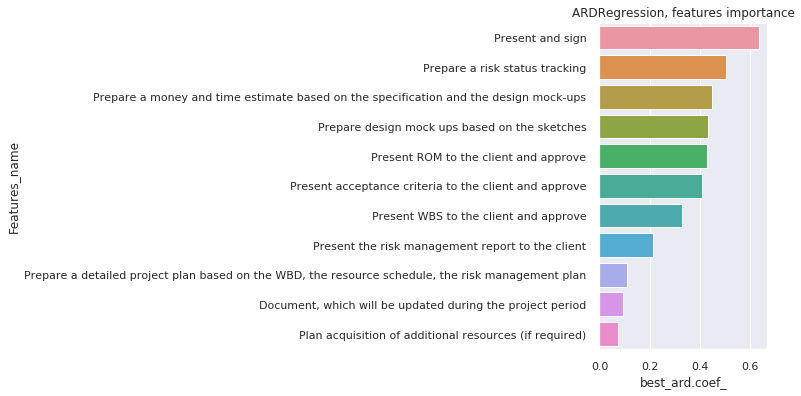

In [642]:
plt.figure(figsize=(3,6))
plt.title('ARDRegression, features importance')
sns.barplot( y ='Features_name', x='best_ard.coef_', data=ard_df.iloc[:11], orient='h')
plt.savefig('ARD_features importance', dpi=300, bbox_inches = "tight")

In [643]:
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [644]:
cs1=cross_val_score(ard,Xtrain, ytrain, cv=skf, scoring='neg_mean_squared_error')
cs1, cs1.mean()

/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


(array([ -9.24571738,  -5.87067664, -31.00210125, -21.08701647,
        -50.81758825]), -23.60461999787673)

In [645]:
cs2=cross_val_score(ard,Xtrain, ytrain, cv=skf, scoring='r2')
cs2, cs2.mean()

/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


(array([ -1.40148503,  -2.19058513,  -7.14653755,  -1.28214464,
        -31.66844959]), -8.737840389761988)

In [646]:
cross_validate(ard,Xtrain, ytrain, cv=skf, scoring='r2')

/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.01595092, 0.02189565, 0.02031517, 0.04168367, 0.02407503]),
 'score_time': array([0.0014658 , 0.0011096 , 0.00072122, 0.00065517, 0.00058055]),
 'test_score': array([ -1.40148503,  -2.19058513,  -7.14653755,  -1.28214464,
        -31.66844959]),
 'train_score': array([0.99955616, 0.93128225, 0.99831485, 0.95242258, 0.99066212])}

In [647]:
mean_squared_error(ytrain.values, ard.predict(Xtrain))

0.4668269577991697

In [648]:
r2_score(ytrain.values, ard.predict(Xtrain))

0.9089194998791831

In [649]:
ard.alpha_

1.1468207972376452

In [650]:
ard.lambda_

array([1.24388293e+01, 3.46460119e+04, 7.66691732e+01, 2.28027805e+03,
       1.01738318e+04, 5.83437708e+03, 1.93158045e+04, 5.35071086e+03,
       1.92065857e+04, 1.54064175e+01, 5.14984088e+00, 6.59247561e+03,
       3.56608333e+03, 1.58058239e+00, 5.13407300e+00, 3.00919860e+04,
       3.88182858e+03, 5.52358760e+00, 4.67553757e+00, 1.33664393e+00,
       3.08600105e+03, 4.72938578e+00, 1.99483713e+01, 6.42645264e+03,
       2.35340251e+00, 6.55382597e+00, 6.49077015e+01, 2.05033462e+04,
       6.12077308e+03, 5.71390281e+03, 3.52148261e+02, 1.13632757e+04,
       1.29017426e+04, 1.41753560e+04, 3.80652890e+00, 5.84130146e+01,
       3.24209481e+01, 5.48072564e+01, 7.88315675e+00, 7.34719219e+03])

In [651]:
ard.sigma_

array([[ 1.11789002e-02,  1.43500267e-04,  9.85542874e-05,
         5.05531913e-06,  3.90951877e-05, -9.88762470e-04,
        -8.85675010e-04, -9.14518253e-06, -2.09594217e-06,
         2.68796133e-03,  1.28957371e-03, -1.09500836e-04,
        -1.48250121e-03,  1.77682093e-03, -7.54734666e-04,
         7.78295600e-05, -3.78593847e-03,  5.32367471e-04,
        -1.49557163e-06, -7.84493296e-03, -9.34041771e-04,
         1.27868362e-03, -2.39188416e-05,  5.31503141e-06,
        -8.96746952e-05,  2.27696657e-03, -3.11250277e-05,
        -3.39626388e-04,  5.27739027e-05, -8.71001630e-05,
        -5.64302027e-05],
       [ 1.43500267e-04,  8.73498423e-03,  1.38816236e-05,
        -7.86483715e-06, -1.65347102e-05, -1.71159322e-03,
        -1.60495685e-03, -2.61934699e-05, -1.43838326e-07,
        -1.77314363e-03, -8.19079271e-04,  2.39276405e-05,
         2.75928468e-04, -9.66068431e-04,  9.15269499e-04,
         3.95055633e-05, -2.35968725e-04, -3.63682856e-04,
         1.89444478e-05, -1.18

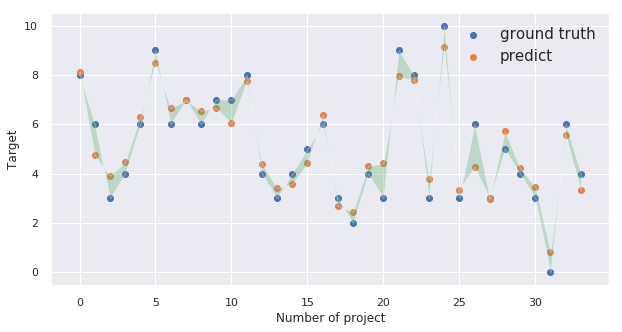

In [677]:
plt.figure(figsize=(10,5))

x_graph=range(ytrain.shape[0])

plt.scatter(x_graph, ytrain)
plt.scatter(x_graph, ard.predict(Xtrain))
plt.fill_between(x_graph, ytrain, y2=ard.predict(Xtrain), where=None, interpolate=False, alpha=0.3)


plt.legend( ('ground truth','predict'),loc='upper right', prop={'size': 15})
plt.ylabel('Target')
plt.xlabel('Number of project')
plt.savefig('ARD_predict', dpi=300, bbox_inches = "tight")

In [615]:
x_graph

range(0, 34)

In [616]:
ytrain.shape[0]

34

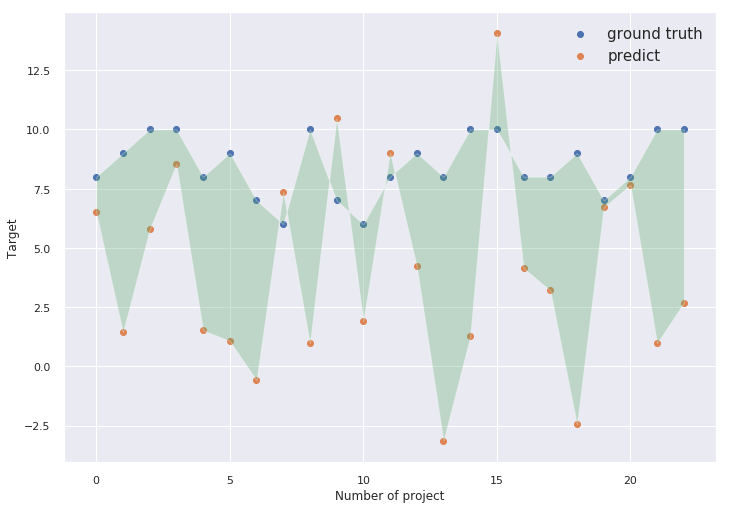

In [619]:
x_graph=range(ytest.shape[0])
plt.scatter(x_graph, ytest)
plt.scatter(x_graph, ard.predict(Xtest))
plt.fill_between(x_graph, ytest, y2=ard.predict(Xtest), where=None, interpolate=False, alpha=0.3)


plt.legend( ('ground truth','predict'),loc='upper right', prop={'size': 15})
plt.ylabel('Target')
plt.xlabel('Number of project')
plt.savefig('ARD_predict_test', dpi=300, bbox_inches = "tight")

In [563]:
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

estimator =ARDRegression ()


params = {'alpha_1': np.linspace(1e-07, 1e-06, 5),
          'alpha_2': np.linspace(1e-05, 1e-04, 5),
          'lambda_1': np.linspace(1e-08, 1e-07, 5),
          'lambda_2': np.linspace(1e-08, 1e-07, 5),
                      
}


gs = GridSearchCV(
    estimator=estimator,  
    param_grid=params,  
    cv=kf,  
    error_score=1,  
       
    verbose=2,  
)


gs.fit(
    X=Xtrain, 
    y=ytrain, 
)

  
best_score = gs.best_score_
#  
best_ard = gs.best_estimator_
#  
print('Best score'.format(
    best_score)
)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08 ....
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08 ....
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08 ....
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08 ....
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08 ....
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=3.25e-08 .
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e

/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=5.5e-08 ..
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=5.5e-08 ..
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=5.5e-08 ..
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=5.5e-08 ..
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=5.5e-08 ..
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=5.5e-08, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=7.75e-08 .
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=7.75e-08

[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=5.5e

[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-07 ....
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-07 ....
[CV]  alpha_1=1e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e

[CV]  alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-07 
[CV]  alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-07 
[CV]  alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_

[CV]  alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=1e-07, alpha_2=3.2500000000000004e-05,

[CV]  alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-07 ..
[CV]  alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-07 ..
[CV]  alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-07 ..
[CV]  alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-07 ..
[CV]  alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-07 ..
[CV]  alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=

[CV]  alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08 
[CV]  alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08 
[CV]  alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08 
[CV]  alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08 
[CV]  alpha_1=1e-

[CV]  alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07 .
[CV]  alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07 .
[CV]  alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07 .
[CV]  alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07 .
[CV]  alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07 .
[CV]  alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=3.25e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=3.25e-08, l

[CV]  alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=7.75e-08, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=7.75e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=7.75e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=7.75e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=7.75e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=7.75e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=7.75e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=7.75e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=7.75e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=7.75e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=7.75e-08, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=7.75e-05, lambda_1=7.75e-08, lambda_2=5.5e-08 
[C

[CV]  alpha_1=1e-07, alpha_2=0.0001, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=0.0001, lambda_1=1e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-07, alpha_2=0.0001, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=0.0001, lambda_1=1e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-07, alpha_2=0.0001, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=0.0001, lambda_1=1e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-07, alpha_2=0.0001, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=0.0001, lambda_1=1e-08, lambda_2=1e-07 ...
[CV]  alpha_1=1e-07, alpha_2=0.0001, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=0.0001, lambda_1=1e-08, lambda_2=1e-07 ...
[CV]  alpha_1=1e-07, alpha_2=0.0001, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=0.0001, lambda_1=1e-08, lambda_2=1e-07 ...
[CV]  alpha_1=1e-07, alpha_2=0.0001, lambda_1=1e-08, lambda_2=1e

[CV]  alpha_1=1e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=1e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-07, alpha_2=0.0001, 

[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=5.5e-08, total=   0.1s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=7.75e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=7.75e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=7.75e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=7.75e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=7.75e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lam

[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.1s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=3.2499999999999996e-07, al

[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=1e-05, lambda_1=1e

[CV]  alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, la

[CV]  alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=1e-07 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=1e-07 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-08, total=  

[CV]  alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=5.5e-08, total=   0.

[CV]  alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08 
[CV]  alpha_1=

[CV]  alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=5.5e-08 
[CV]  alpha_1=

[CV]  alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=5.5e-08 
[CV]  alpha_1=3.24999999999999

[CV]  alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  al

[CV]  alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=3.2499999999999996e-

[CV]  alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=1e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=1e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=3.25e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=3.25e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=3.25e-08 
[CV]  alpha_1=3.24999999999999

[CV]  alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=1e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=1e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=1e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=1e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=7.75e-08, lambda_2=1e-08 
[CV]  alpha_1=3.2499999999999996e-07, alpha_2=

[CV]  alpha_1=3.2499999999999996e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08 ..
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08 ..
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08 ..
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08 ..
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08 ..
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-08, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-08,

[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=5.5e-07, alpha_

[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=7.75e-08 
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=7.75e-08 
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-07 ..
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-07 ..
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-07 ..
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-07 ..
[CV]  alpha_1=5.5e-07, alpha_2=1e-05, lambda_1=1e-07, lambd

[CV]  alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=7.75e-08 
[CV]  alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=7.75e-08 
[CV]  alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-0

[CV]  alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=7.75e-08 
[CV]  alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=7.75e-08 
[CV]  alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-0

[CV]  alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=7.75e-08 
[CV]  alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=7.75e-08 
[CV]  alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=7.75e-08 
[CV]  alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-07, alpha_2=5.5e-0

[CV]  alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=1e-08 
[CV]  alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=1e-08 
[CV]  alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=1e-08 
[CV]  alpha_1=5.5e-07, alpha_

[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=5.5e-08 
[CV]  alpha_1=

[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2

[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=5.5e-08 
[CV]  alpha_1=

[CV]  alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=7.75e-08 
[CV]  alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=7.75e-08 
[CV]  alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=3.25e-08, lambda_2=1e-07 
[CV]  alpha_1=5.5e-

[CV]  alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=1e-08 .
[CV]  alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=1e-08 .
[CV]  alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=5.5e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=5.5e-07, alpha_2=0.0001, lambda_1

[CV]  alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=5.5e-08 
[CV]  alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=5.5e-08 
[CV]  alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=5.5e-08, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08 
[CV]  alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08 
[CV]  alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08 
[CV]  alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08 
[CV

[CV]  alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=7.75e-08, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-08 .
[CV]  alpha_1=7.75e-07, alpha_2=1

[CV]  alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=7.75e-08 
[CV]  alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=7.75e-08 
[CV]  alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=3.250000

[CV]  alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alph

[CV]  alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=5.5e-08 
[CV]  alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=5.5e-08 
[CV]  alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=5.5e-08 
[CV]  alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=5.5e-08, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=7.75e-08 
[CV]  alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=3.2500000000000004e-05, lambda_1=1e-07, lambda_2=7.75e-08 
[CV]  alpha_1=7.75e-07, alpha_2=

[CV]  alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08 
[CV]  alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08 
[CV]  alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08 
[CV]  alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=5.5e-08, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=7.75e-08 
[CV]  alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=7.75e-08 
[CV]  alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=3.25e-08, 

[CV]  alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=7.75e-08, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=5.5e-05, lambda_1=1e-07, lambda_2=1e-08 
[CV]  alph

[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=3.25e-08, lambda_2=1e-08 
[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=3.25e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=3.25e-08, lambda_2=1e-08 
[CV]  alpha_1=7.75e-07, a

[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=7.75e-08, lambda_2=1e-08 
[CV]  

[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07 
[CV]  alpha_1=7.75e-07, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=1e-08, lambda_2=1e-08 
[CV]  alpha_1=7.75e-07, alpha_2=0

[CV]  alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=5.5e-08 
[C

[CV]  alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08 
[CV]  alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=7.75e-07, alpha_2=0.0001, lambda_1=1e-07, lambda_2=5.5e-08 
[CV]  alpha_1=7.75e-07, al

[CV]  alpha_1=1e-06, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=5.5e-08, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=1e-05, lambda_1=3.25e-08, lambda_2=1e-07 .
[CV]  alpha_1=1e-06, alpha_2=1e-05, l

[CV]  alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-08 ....
[CV]  alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-08 ....
[CV]  alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-08 ....
[CV]  alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-08 ....
[CV]  alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-07, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-07, lambda_2=3.25e-08 .
[CV]  alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-07, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-07, lambda_2=3.25e-08 .
[CV]  alpha_1=1e-06, alpha_2=1e-05, lambda_1=1e-07, lambda_2=3.25e-08, total=  

[CV]  alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=1e-08, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=3.25e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambd

[CV]  alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-08 
[CV]  alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=3.2500000000000004e-05, lambda_1=7.75e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-06, alpha_2=3.250000000

[CV]  alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=1e-08, lambda_2=5.5e-08 
[CV]  alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=1e-

[CV]  alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=5.5e-08, lambda_2=1e-07 
[CV]  alpha_1=1e-06, alpha

[CV]  alpha_1=1e-06, alpha_2=5.5e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-08 .
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-08 .
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-08 .
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-08 .
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-08 .
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=1e-08, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-08, lambda_2

[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=5.5e-08, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06,

[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07 .
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07 .
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07 .
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07 .
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07 .
[CV]  alpha_1=1e-06, alpha_2=7.75e-05, lambda_1=1e-07, lambda_2=1e-07, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-08, lambda_2=1e-08 ...
[CV]  alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-08, lambda_2

[CV]  alpha_1=1e-06, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-06, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-06, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-06, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08 
[CV]  alpha_1=1e-06, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=3.25e-08, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=1e-06, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=5.5e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=0.0001, lambda_1=5.5e-08, lambda_2=5.5e-08 
[CV]  alpha_1=1e-06, alpha_2=0.0001, 

[CV]  alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-07, lambda_2=5.5e-08, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-07, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-07, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-07, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-07, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-07, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-07, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-07, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-07, lambda_2=7.75e-08, total=   0.0s
[CV] alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-07, lambda_2=7.75e-08 
[CV]  alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-07, lambda_2=7.75e-08, total=   0.1s
[CV] alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-07, lambda_2=1e-07 ...
[CV]  alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-07, lambda

[Parallel(n_jobs=1)]: Done 3125 out of 3125 | elapsed:  1.0min finished


In [582]:
best_ard

ARDRegression(alpha_1=1e-06, alpha_2=0.0001, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-08, lambda_2=7.75e-08, n_iter=300,
       normalize=False, threshold_lambda=10000.0, tol=0.001, verbose=False)

In [583]:
best_score

-3.37371225171486

In [566]:
score_best_ard=cross_val_score(best_ard, Xtrain, ytrain, cv=kf, verbose=1,scoring='neg_mean_squared_error')
score_best_ard,score_best_ard.mean(), score_best_dt.std()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


(array([ -9.24638803,  -5.88377748, -29.74577124, -20.84072205,
        -20.35069155]), -17.213470069386066, 0.5472963693927579)

In [567]:
score_best_ard=cross_val_score(best_ard, Xtrain, ytrain, cv=kf, verbose=1,scoring='r2')
score_best_ard, score_best_ard.mean(), score_best_dt.std()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


(array([ -1.40165923,  -2.19770515,  -6.81640704,  -1.2554894 ,
        -12.08258743]), -4.75076964964037, 0.5472963693927579)

In [568]:
cross_validate(best_ard,Xtrain, ytrain, cv=skf, scoring='r2')

/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.01149988, 0.0124023 , 0.00894189, 0.01430964, 0.05917072]),
 'score_time': array([0.00106931, 0.0008173 , 0.000736  , 0.00073266, 0.00065231]),
 'test_score': array([ -1.40165923,  -2.19770515,  -6.81640704,  -1.2554894 ,
        -12.08258743]),
 'train_score': array([0.99955742, 0.93063692, 0.99706949, 0.94344221, 0.96794128])}

In [569]:
mean_squared_error(ytrain.values, best_ard.predict(Xtrain))

0.4668000803414704

In [570]:
r2_score(ytrain.values, best_ard.predict(Xtrain))

0.9089247438186093

In [656]:
best_ard.fit(Xtrain, ytrain)

ARDRegression(alpha_1=1e-06, alpha_2=0.0001, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-08, lambda_2=7.75e-08, n_iter=300,
       normalize=False, threshold_lambda=10000.0, tol=0.001, verbose=False)

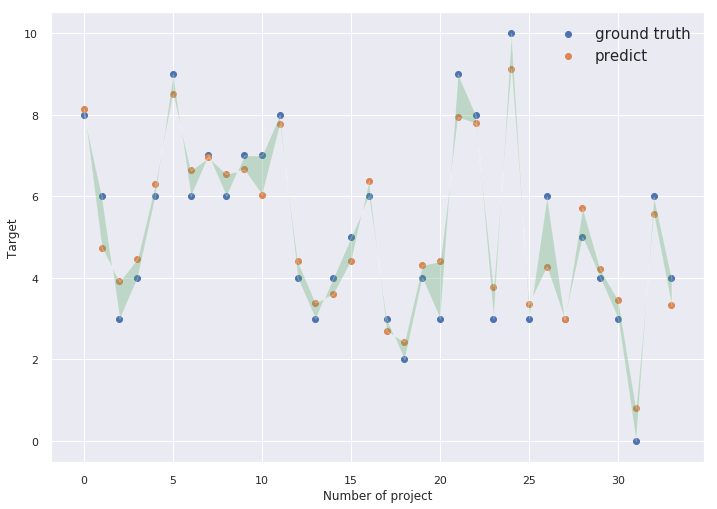

In [657]:
plt.scatter(x_graph, ytrain)
plt.scatter(x_graph, best_ard.predict(Xtrain))
plt.fill_between(x_graph, ytrain, y2=best_ard.predict(Xtrain), where=None, interpolate=False, alpha=0.3)


plt.legend( ('ground truth','predict'),loc='upper right', prop={'size': 15})
plt.ylabel('Target')
plt.xlabel('Number of project')
plt.show()


In [658]:
ls=Lasso()

In [668]:
ls.fit(Xtrain, ytrain)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [660]:
ls.coef_

array([-0.        , -0.        , -0.        ,  0.02618346, -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.2027906 ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.14516297,
        0.        , -0.        ,  0.04712577, -0.        ,  0.        ])

In [661]:
mean_squared_error(ytrain.values, ls.predict(Xtrain))

3.4454349380746603

In [662]:
r2_score(ytrain.values, ls.predict(Xtrain))

0.3277767445714248

In [663]:
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [664]:
cross_val_score(ls,Xtrain, ytrain, cv=skf, scoring='r2')

/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([-0.54979887, -0.92404744,  0.20660388,  0.05511336, -2.46149751])

In [665]:
cross_validate(ls,Xtrain, ytrain, cv=skf, scoring='r2')

/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00276208, 0.00213861, 0.0017364 , 0.00171304, 0.00173473]),
 'score_time': array([0.00094604, 0.00089049, 0.0007844 , 0.00075912, 0.00080919]),
 'test_score': array([-0.54979887, -0.92404744,  0.20660388,  0.05511336, -2.46149751]),
 'train_score': array([0.51865496, 0.42132804, 0.36190949, 0.33394934, 0.40640621])}

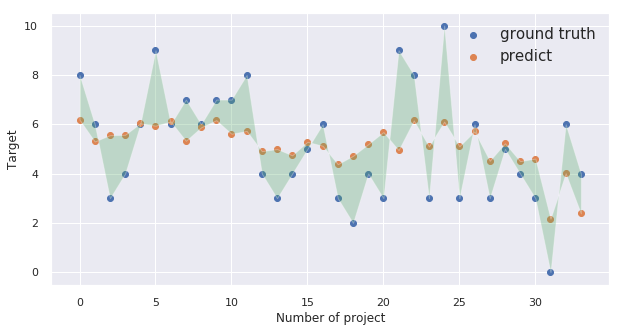

In [670]:
plt.figure(figsize=(10,5))

plt.scatter(x_graph, ytrain)
plt.scatter(x_graph, ls.predict(Xtrain))
plt.fill_between(x_graph, ytrain, y2=ls.predict(Xtrain), where=None, interpolate=False, alpha=0.3)


plt.legend( ('ground truth','predict'),loc='upper right', prop={'size': 15})
plt.ylabel('Target')
plt.xlabel('Number of project')
plt.savefig('Lasso_predict', dpi=300, bbox_inches = "tight")

In [350]:
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

from os import cpu_count

n_jobs = max(cpu_count()-1, 1)

estimator = RandomForestRegressor(random_state=42, n_jobs=-1)
   
params = {'max_depth': [ 15, 20,25, 35,50],
          'min_samples_leaf': [1,3,5,7],
          'max_features': [0.4,0.6,0.7,0.8,0.9],
          'n_estimators': [5,7,10]
          
    
}


gs = RandomizedSearchCV(
    estimator=estimator,   
    param_distributions=params,  # 
    cv=kf,   
    error_score=1,   
     
    verbose=2,  
    n_iter=10
    
)

 
gs.fit(
    X=Xtrain, 
    y=ytrain, 
)
# -------------------------------------------------------------
#  
best_score = gs.best_score_
#  
best_dt = gs.best_estimator_
#  
print('Best score'.format(
    best_score)
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_leaf=7, max_features=0.8, max_depth=15 


/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=10, min_samples_leaf=7, max_features=0.8, max_depth=15, total=   0.1s
[CV] n_estimators=10, min_samples_leaf=7, max_features=0.8, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=10, min_samples_leaf=7, max_features=0.8, max_depth=15, total=   0.1s
[CV] n_estimators=10, min_samples_leaf=7, max_features=0.8, max_depth=15 
[CV]  n_estimators=10, min_samples_leaf=7, max_features=0.8, max_depth=15, total=   0.1s
[CV] n_estimators=10, min_samples_leaf=7, max_features=0.8, max_depth=15 
[CV]  n_estimators=10, min_samples_leaf=7, max_features=0.8, max_depth=15, total=   0.1s
[CV] n_estimators=10, min_samples_leaf=7, max_features=0.8, max_depth=15 
[CV]  n_estimators=10, min_samples_leaf=7, max_features=0.8, max_depth=15, total=   0.1s
[CV] n_estimators=7, min_samples_leaf=5, max_features=0.6, max_depth=35 
[CV]  n_estimators=7, min_samples_leaf=5, max_features=0.6, max_depth=35, total=   0.1s
[CV] n_estimators=7, min_samples_leaf=5, max_features=0.6, max_depth=35 
[CV]  n_estimators=7, min_samples_leaf=5, max_features=0.6, max_depth=35, total=   0.1s
[CV] n_estimators=7, min_samples_leaf=5, max_features=0.6, max_depth=35 
[CV]  n_estimators=7, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.7s finished


In [ ]:
best_dt

In [352]:
best_score

-0.3014841211633011

In [353]:
score_best_dt=cross_val_score(best_dt, Xtrain, ytrain, cv=kf, verbose=1,scoring='neg_mean_squared_error')
score_best_dt, score_best_dt.std()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


(array([-5.89146125, -2.75124077, -2.99302373, -8.95032922, -3.66402515]),
 2.3305376509247506)

In [354]:
score_best_dt=cross_val_score(best_dt, Xtrain, ytrain, cv=kf, verbose=1,scoring='r2')
score_best_dt, score_best_dt.std()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


(array([-0.53024967, -0.49523955,  0.21351201,  0.03134965, -1.35544474]),
 0.5472963693927579)

Text(0.5, 0, 'Number of project')

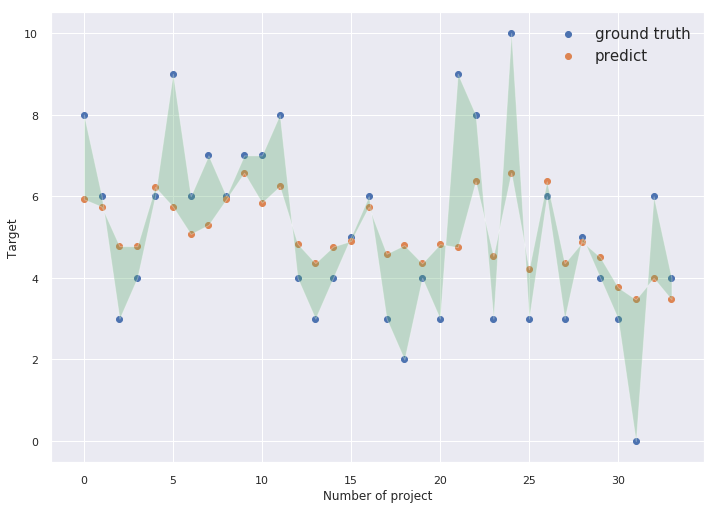

In [500]:
plt.scatter(x_graph, ytrain)
plt.scatter(x_graph, best_dt.predict(Xtrain))
plt.fill_between(x_graph, ytrain, y2=best_dt.predict(Xtrain), where=None, interpolate=False, alpha=0.3)


plt.legend( ('ground truth','predict'),loc='upper right', prop={'size': 15})
plt.ylabel('Target')
plt.xlabel('Number of project')

